In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import cv2
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers, models
import datetime
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [2]:
data_dir = r'C:\Users\joann\OneDrive\Dokumenty\MEGAsync\Asia\DATA_SCIENCE\DL\projekt\archive\64'

In [3]:
train_datagen = ImageDataGenerator(
    validation_split=0.1,
    rescale=1./255
)
test_generator = train_datagen.flow_from_directory(
    data_dir,
    class_mode='categorical',
    target_size=(64, 64),
    subset='validation',
    shuffle=True,
    batch_size=50000,
    seed=0
)

Found 80000 images belonging to 200 classes.


In [4]:
x_test, y_test = next(test_generator)

In [5]:
model = models.load_model(r'C:\Users\joann\OneDrive\Dokumenty\MEGAsync\Asia\DATA_SCIENCE\DL\projekt\model_ost\model068acc.h5')

In [6]:
y_pred = model.predict(x_test)
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

1563/1563 [==============================] - 42s 26ms/step
              precision    recall  f1-score   support

           0       0.61      0.76      0.68       246
           1       0.79      0.71      0.75       258
           2       0.53      0.28      0.37       254
           3       0.96      0.92      0.94       249
           4       0.74      0.81      0.77       247
           5       0.60      0.56      0.58       262
           6       0.75      0.53      0.62       255
           7       0.50      0.45      0.47       256
           8       0.89      0.74      0.81       246
           9       0.84      0.67      0.74       248
          10       0.67      0.94      0.78       266
          11       0.59      0.52      0.55       231
          12       0.53      0.67      0.60       240
          13       0.82      0.82      0.82       261
          14       0.95      0.91      0.93       239
          15       0.91      0.82      0.86       253
          16       0.9

In [19]:
pip install ipywidgets

     ------------------------------------- 138.3/138.3 kB 48.8 kB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 94.6 kB/s eta 0:00:00
     ------------------------------------ 198.2/198.2 kB 171.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

In [26]:
explanation = explainer.explain_instance(x_test[2250].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 33ms/step


(-0.5, 63.5, 63.5, -0.5)

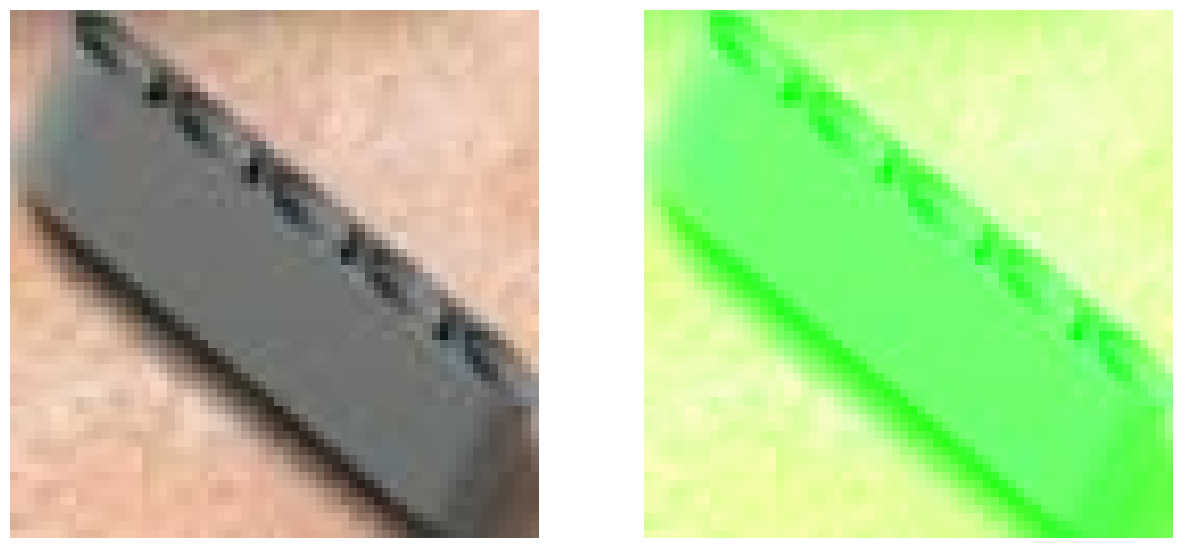

In [27]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

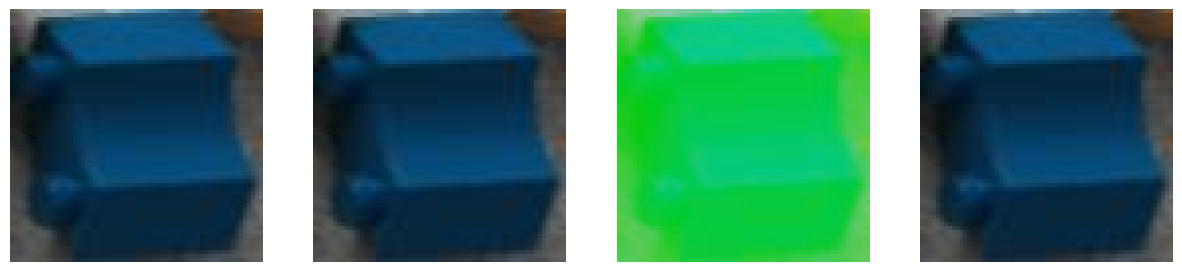

In [15]:
num_versions = 3  # Liczba wersji do wygenerowania

fig, axes = plt.subplots(1, num_versions+1, figsize=(15, 15))
axes[0].imshow(mark_boundaries(temp_1, mask_1))  # Wyświetlenie pierwszej wersji obrazu jako oryginał
axes[0].axis('off')

for i in range(num_versions):
    positive_only = True if i % 2 == 0 else False  # Kolejne wersje będą miały różne ustawienia positive_only
    num_features = (i + 1) * 5  # Kolejne wersje będą miały różną liczbę cech
    
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=positive_only,
                                                num_features=num_features, hide_rest=not positive_only)
    axes[i+1].imshow(mark_boundaries(temp, mask))
    axes[i+1].axis('off')

plt.show()